<a id = "Table_of_content"></a>
# Table of content
### 1. [Data Analysis and processing](#T1)
#### &emsp; i)  [Drop all the attribute with more than 10% missing value](#T11)
#### &emsp; ii) [Fill NULL in categorical data](#T12)
#### &emsp; iii) [Fill NULL in numerical data](#T13)
#### &emsp; iv) [Convert categorical data to numerical data](#T14)
### 2. [Feature Engineering](#T2)
#### &emsp; i)  [Add extra feature 1 (Difference between date) - 'Diff_date':day](#T21)
#### &emsp; i)  [Add extra feature 2 (num_date) and categorize the data into 3 group](#T22)
### 3. [Save the model](#T3)

# Objective
* predict the probability that a customer does not pay back their credit card balance
* Below output is an example that run 99,999 data

<a id = "T1"></a></a><div style="text-align: right"> <a href=#Table_of_content>Back?</a> </div>
# Data Analysis and Processing

* Since our data contain more than 5 million data, our computer cannot support load all data at once,
* Therefore, it is loaded and processed 1 million by million and later concatenate it
* For each round, we change the "num" and "skipr" and the file name at the bottom of the notebook

In [1]:
import numpy as np  
import pandas as pd

In total, we have 5,531,452 data in train dataset

|Info|Index|num|skipr|
|:-:|:-:|:-:|:-:|
|G1|0 - 999, 998|999,999|---|
|G2|999,998 - 1,999,987|999,990|1 + 999999|
|G3|1,999,988 - 2,999,982|999995|1 + 999999 + 999990|
|G4|2,999,983 - 3,999,971|999989|1 + 999999 + 999990 + 999995|
|G5|3,999,972 - 4,999,963|999992|1 + 999999 + 999990 + 999995 + 999989|
|G6|4,999,964 - 5,531,451|531487|1 + 999999 + 999990 + 999995 + 999989 + 999992|




In [2]:
df_col_name = pd.read_csv('train_data.csv' ,nrows=1)

In [3]:
# For first time, we just load 999,999 data （G1)
df_train = pd.read_csv('train_data.csv',nrows= 999999) 
df_label = pd.read_csv("train_labels.csv")

In [4]:
%%time
# For Group 2 - 6
# skipr = 1 + 999999 
# num = 999990

# df_train = pd.read_csv('train_data.csv', skiprows = skipr ,nrows=num, names = df_col_name.columns)  # 100萬
# df_label = pd.read_csv("train_labels.csv")

Wall time: 0 ns


In [5]:
# Test for the customer id

# df_train.head(5)
# df_train.tail(5)
df_train.shape
# df_train.info() 

(99999, 190)

<a id = "T11"></a></a><div style="text-align: right"> <a href=#Table_of_content>Back?</a> </div>
### i) Drop all the attribute with more than 10% missing value

In [6]:
col_miss = [col for col in df_train.columns if df_train[col].isnull().sum() > 1]
print(f"Number of col with more than 1 missing value is =",len(col_miss))

for i in range(1,10):
    col_miss = [col for col in df_train.columns if df_train[col].isnull().sum() > i/10 * len(df_train)]
    print(f"Number of col with more than {i*10} % missing value is =",len(col_miss))

Number of col with more than 1 missing value is = 117
Number of col with more than 10 % missing value is = 39
Number of col with more than 20 % missing value is = 34
Number of col with more than 30 % missing value is = 32
Number of col with more than 40 % missing value is = 31
Number of col with more than 50 % missing value is = 30
Number of col with more than 60 % missing value is = 25
Number of col with more than 70 % missing value is = 25
Number of col with more than 80 % missing value is = 23
Number of col with more than 90 % missing value is = 15


In [7]:
# col_miss_10 = [col for col in df_train.columns if df_train[col].isnull().sum() > 0.1 * len(df_train)]

col_miss_10 = ['S_3', 'D_42', 'D_43', 'D_46', 'D_48', 'D_49', 'D_50', 'D_53', 'S_7', 'D_56', 'S_9', 'D_61', 'D_62', 'B_17', 'D_66', 'D_73', 'D_76', 'D_77', 'R_9', 'D_82', 'B_29', 'D_87', 'D_88', 'D_105', 'D_106', 'R_26', 'D_108', 'D_110', 'D_111', 'B_39', 'S_27', 'B_42', 'D_132', 'D_134', 'D_135', 'D_136', 'D_137', 'D_138', 'D_142']
print(col_miss_10)

['S_3', 'D_42', 'D_43', 'D_46', 'D_48', 'D_49', 'D_50', 'D_53', 'S_7', 'D_56', 'S_9', 'D_61', 'D_62', 'B_17', 'D_66', 'D_73', 'D_76', 'D_77', 'R_9', 'D_82', 'B_29', 'D_87', 'D_88', 'D_105', 'D_106', 'R_26', 'D_108', 'D_110', 'D_111', 'B_39', 'S_27', 'B_42', 'D_132', 'D_134', 'D_135', 'D_136', 'D_137', 'D_138', 'D_142']


In [8]:
col_miss_10 = ['S_3', 'D_42', 'D_43', 'D_46', 'D_48', 'D_49', 'D_50', 'D_53', 'S_7', 'D_56', 'S_9', 'D_61', 'D_62', 'B_17', 'D_66', 'D_73', 'D_76', 'D_77', 'R_9', 'D_82', 'B_29', 'D_87', 'D_88', 'D_105', 'D_106', 'R_26', 'D_108', 'D_110', 'D_111', 'B_39', 'S_27', 'B_42', 'D_132', 'D_134', 'D_135', 'D_136', 'D_137', 'D_138', 'D_142']
df_train = df_train.drop(columns = col_miss_10)
print(len(col_miss_10),"attributes has been dropped")

39 attributes has been dropped


* For remaining attribute, 
* For categorical data, we can fill the NULL value by the __most occurances data__ 
* For numerical data, we can fill NULL value by the __mean values__

In [9]:
# define categorical variables (columns)
categorical = list(df_train.select_dtypes('object').columns)
print(f"{len(categorical)} Categorical variables (columns) are: {np.sort(categorical)}")

# define numerical variables (columns)
numerical = list(df_train.select_dtypes('number').columns)
print(f"{len(numerical)} Numerical variables (columns) are: {np.sort(numerical)}")

4 Categorical variables (columns) are: ['D_63' 'D_64' 'S_2' 'customer_ID']
147 Numerical variables (columns) are: ['B_1' 'B_10' 'B_11' 'B_12' 'B_13' 'B_14' 'B_15' 'B_16' 'B_18' 'B_19'
 'B_2' 'B_20' 'B_21' 'B_22' 'B_23' 'B_24' 'B_25' 'B_26' 'B_27' 'B_28'
 'B_3' 'B_30' 'B_31' 'B_32' 'B_33' 'B_36' 'B_37' 'B_38' 'B_4' 'B_40'
 'B_41' 'B_5' 'B_6' 'B_7' 'B_8' 'B_9' 'D_102' 'D_103' 'D_104' 'D_107'
 'D_109' 'D_112' 'D_113' 'D_114' 'D_115' 'D_116' 'D_117' 'D_118' 'D_119'
 'D_120' 'D_121' 'D_122' 'D_123' 'D_124' 'D_125' 'D_126' 'D_127' 'D_128'
 'D_129' 'D_130' 'D_131' 'D_133' 'D_139' 'D_140' 'D_141' 'D_143' 'D_144'
 'D_145' 'D_39' 'D_41' 'D_44' 'D_45' 'D_47' 'D_51' 'D_52' 'D_54' 'D_55'
 'D_58' 'D_59' 'D_60' 'D_65' 'D_68' 'D_69' 'D_70' 'D_71' 'D_72' 'D_74'
 'D_75' 'D_78' 'D_79' 'D_80' 'D_81' 'D_83' 'D_84' 'D_86' 'D_89' 'D_91'
 'D_92' 'D_93' 'D_94' 'D_96' 'P_2' 'P_3' 'P_4' 'R_1' 'R_10' 'R_11' 'R_12'
 'R_13' 'R_14' 'R_15' 'R_16' 'R_17' 'R_18' 'R_19' 'R_2' 'R_20' 'R_21'
 'R_22' 'R_23' 'R_24' 'R_25' '

<a id = "T12"></a></a><div style="text-align: right"> <a href=#Table_of_content>Back?</a> </div>
### Fill NULL in categorical data

In [10]:
print(df_train["D_63"].value_counts().sum())
print(df_train["D_64"].value_counts().sum())

99999
95919


* From the website, here is the distribution of data
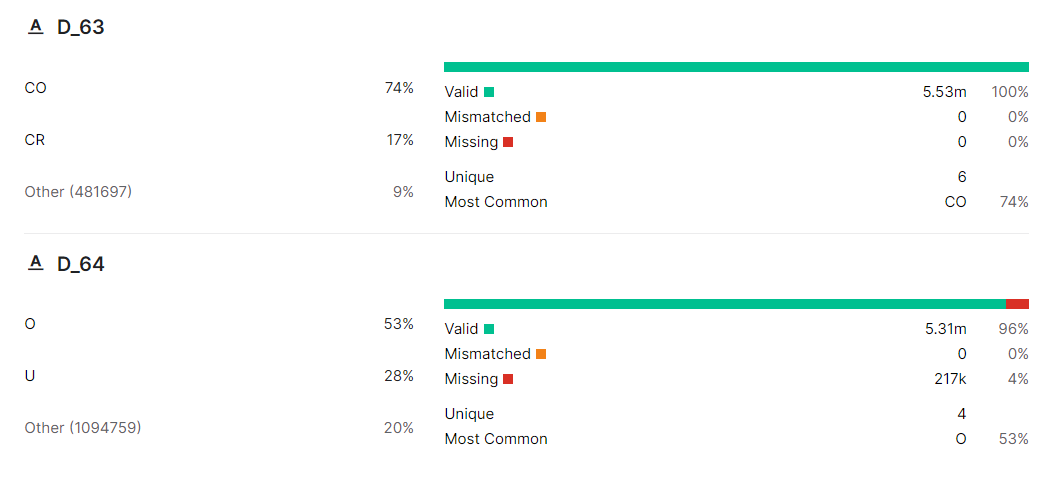

In [11]:
df_train["D_64"] = df_train["D_64"].fillna("O")

In [12]:
# df_train["D_63"].value_counts().sum()
df_train["D_64"].value_counts().sum()

99999

<a id = "T13"></a></a><div style="text-align: right"> <a href=#Table_of_content>Back?</a> </div>
### Fill NULL in numerical data

In [1]:
saved_mean = []  # Save the mean used so that when predict the outcome from unseen data, we can use back the same mean value
for col in numerical:
    mean = df_train[col].mean()
    df_train[col] = df_train[col].fillna(mean)
    saved_mean.append(mean)

NameError: name 'numerical' is not defined

In [14]:
print("The train dataset contain NULL value ?",any(df_train.isnull().sum()))

The train dataset contain NULL value ? False


<a id = "T14"></a></a><div style="text-align: right"> <a href=#Table_of_content>Back?</a> </div>
### iv) Convert categorical data to numerical data

* For D_63 attribute

In [15]:
df_train["D_63"].value_counts()

CO    73773
CR    17378
CL     8059
XZ      485
XM      159
XL      145
Name: D_63, dtype: int64

In [16]:
df_train["D_63"] = df_train["D_63"].replace(['CR','CO',"CL","XZ","XM","XL"],[1, 5/6, 4/6, 3/6, 2/6, 1/6])

In [17]:
df_train["D_63"].min() 

0.16666666666666666

* For D_64 attribute

In [18]:
df_train["D_64"].value_counts()

O     57382
U     27388
R     14535
-1      694
Name: D_64, dtype: int64

In [19]:
df_train["D_64"] = df_train["D_64"].replace(['O','U',"R","-1"],[1,3/4,2/4,1/4])

In [20]:
df_train["D_64"].min()

0.25

<a id = "T2"></a></a><div style="text-align: right"> <a href=#Table_of_content>Back?</a> </div>
# Feature Engineering

<AxesSubplot:xlabel='customer_ID', ylabel='Count'>

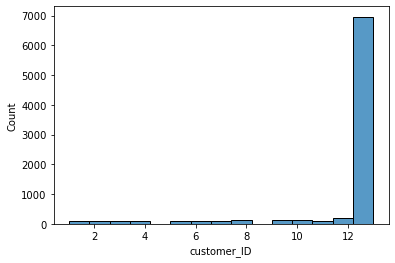

In [21]:
import seaborn as sns

df_customer = df_train['customer_ID'].value_counts()
sns.histplot(df_customer)

In [23]:
df_customer.value_counts(sort=False)
df_customer = df_train['customer_ID'].value_counts(sort=False)
print(f"There are total of {len(df_customer)} customers in 999,999 data")

There are total of 8294 customers in 999,999 data


In [24]:
df_customer.value_counts(sort=False)

13    6964
3       99
4       92
9      129
12     191
8      133
2       96
10     125
1       92
7       92
6       84
11     103
5       94
Name: customer_ID, dtype: int64

左邊是num_of_purchase, 右邊是num_customers

<a id = "T21"></a></a><div style="text-align: right"> <a href=#Table_of_content>Back?</a> </div>
### i) Add extra feature 1 (Difference between date) - 'Diff_date':day

In [25]:
month_dic = {1:31, 2:59, 3:90, 4:120, 5:151, 6:181, 7:212, 8:243, 9:273, 10:304, 11:334, 12:365}
diff_date = []

def find_total_day(date):
    year, month, day = map(int,date.split('-'))
    total_day = year * 365 + month_dic[month] + day  
    return total_day


total_day_previous = find_total_day(df_train.iloc[0]["S_2"])  # First date in train_dataset
for date in df_train["S_2"]:
    total_day_current = find_total_day(date)
    if total_day_current > total_day_previous:
        diff_date.append(total_day_current - total_day_previous)
    else:
        diff_date.append(0)
    total_day_previous = total_day_current

In [26]:
# Normalize it to between 0-1
diff_date = np.array(diff_date)

max_diff_date =  diff_date.max()
diff_date = diff_date / max_diff_date
print(max_diff_date)

357


In [27]:
df_train.insert(2,"Diff_date",diff_date)

<a id = "T22"></a></a><div style="text-align: right"> <a href=#Table_of_content>Back?</a> </div>
### ii) Add extra feature 2 (num_date) and categorize the data into 3 group
For each customer id, it is seperated to:
* Group 1 (Have 10-13 rows of data) - df_train1013
* Group 2 (Have 5 - 9 &nbsp; rows of data) - df_train59
* Group 3 (Have 1 - 4 &nbsp; rows of data) - df_train14

In [28]:
original_col_name = list(df_train.columns[2:])  # Exclude the first and second column "customer_ID" and S_2

# function to get the column name for the dataframe
def get_col_name(iteration):
    column_name = []
    for i in range(iteration):
        for col_name in original_col_name:
            column_name.append(col_name+f"_{i}")
    return column_name

In [29]:
df_cus_index = df_customer.index
df_cus_index = df_cus_index.to_numpy()
df_customer = df_customer.to_numpy()

# Get the corresponding customer id for a group
cus_10_13 = list(df_cus_index[df_customer >= 10])
cus_5_9 = list(df_cus_index[np.where(np.logical_and(df_customer >= 5, df_customer <= 9))] )
cus_1_4 = list(df_cus_index[df_customer < 5])

# Create columns name corresponding to each group
column_name_10_13 = get_col_name(10)
column_name_5_9 = get_col_name(5)
column_name_1_4 = get_col_name(1)

In [30]:
df_customer = df_train['customer_ID'].value_counts(sort=False)
index_1013 = np.where((df_customer >= 10).to_numpy())[0]
index_59 = np.where(np.logical_and(df_customer >= 5, df_customer <= 9))[0]
index_14 = np.where(df_customer < 5)[0]


In [31]:
df_series = df_train.groupby("customer_ID")["S_2"].count()             # Get the count for the number of date for each customer_ID

def process_train_data(cus_id, column_name, num):
    df = df_train.loc[df_train['customer_ID'].isin(cus_id)]            # Get all row of data with the customer ID in 'cus_id'
    df = df.groupby("customer_ID").tail(num)                           # Get last 10 row
    df.reset_index(drop=True)                                          # Reset the index to count from 0 - n
    df = df.drop(columns =["customer_ID","S_2"])                       # Drop 2 columns of data
    
    row, col = df.shape
    df = np.reshape(df.to_numpy(),(-1,num*col))                        # reshape from size (row,col) to (-1, num*col)
    df = pd.DataFrame(df, columns = column_name)                        # convert back to pandas dataframe

    new_attribute = df_series.loc[df_series.index.isin(cus_id)]        # Get the new attribute

    df.insert(1,"num_date",np.array(new_attribute))                    # Insert new column of data
    df["num_date"] = df["num_date"] / 13                               # Normalize new col to 0-1
    return df

In [32]:
df_train1013 = process_train_data(cus_10_13, column_name_10_13, 10)
df_train59 = process_train_data(cus_5_9, column_name_5_9, 5)
df_train14 = process_train_data(cus_1_4, column_name_1_4, 1)

In [33]:
print(df_train1013.shape)
print(df_train59.shape)
print(df_train14.shape)

(7383, 1501)
(532, 751)
(379, 151)


* For each customer ID, find all its corresponding label in the train_label 

In [34]:
df_label_10_13 = df_label.loc[df_label['customer_ID'].isin(cus_10_13)]
df_label_10_13 = df_label_10_13.reset_index(drop=True)

df_label_5_9 = df_label.loc[df_label['customer_ID'].isin(cus_5_9)]
df_label_5_9 = df_label_5_9.reset_index(drop=True)

df_label_1_4 = df_label.loc[df_label['customer_ID'].isin(cus_1_4)]
df_label_1_4 = df_label_1_4.reset_index(drop=True)

In [35]:
df_label_10_13 = df_label_10_13.drop(columns = ['customer_ID'])
df_label_5_9 = df_label_5_9.drop(columns = ['customer_ID'])
df_label_1_4 = df_label_1_4.drop(columns = ['customer_ID'])

In [36]:
df_label_10_13.head(5)

,target
0,0
1,0
2,0
3,0
4,0


<a id = "T22"></a></a><div style="text-align: right"> <a href=#Table_of_content>Back?</a> </div>
# Save the model

In [38]:
df_label_10_13.to_csv("label_1013_0.csv",index=False)
df_label_5_9.to_csv("label_59_5.csv",index=False)
df_label_1_4.to_csv("label_14_5.csv",index=False)

df_train1013.to_csv("train_1013_0.csv",index=False)
df_train59.to_csv("train_59_0.csv",index=False)
df_train14.to_csv("train_14_0.csv",index=False)